# EDA on Haberman Survival DataSet
There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

Number of Axillary nodes(Lymph Nodes)
Age
Operation Year
Survival Status

Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)

Operation year: Year in which patient was undergone surgery(1958–1969)

Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

# Objective

Classify wheather a new patient is survived more than 5 years or not

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
col_Names=["Age", "Year", "Axil_Node", "Status"]
df= pd.read_csv("haberman.csv",names=col_Names)

In [10]:
df.shape

(306, 4)

In [11]:
df.columns
df.head(20)

,Age,Year,Axil_Node,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [12]:
df['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

# Observation:
Only 225 patients survived 5 years or longer
And 81 the patient died within 5 years


# PDF (Probability Density Function):- 
    It shows the density of that data or number of data present on that point. 
    PDF will be a peak like structure represents high peak if more number of data present or else it will be 
    flat/ small peak if number of data present is less.
    It is smooth graph plot using the edges of histogram


#    CDF (Cumulative Distribution Function):- 
    It is representation of cumulative data of PDF ie.
    it will plot a graph by considering PDF for every data point cumulatively.

# PDF of Year of operation

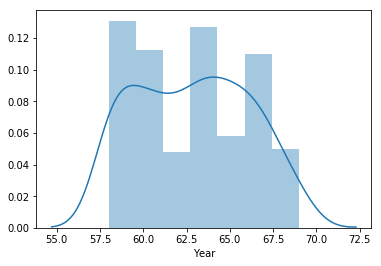

In [13]:
d=df['Year'] #for my info
sns.distplot(d)
plt.show()

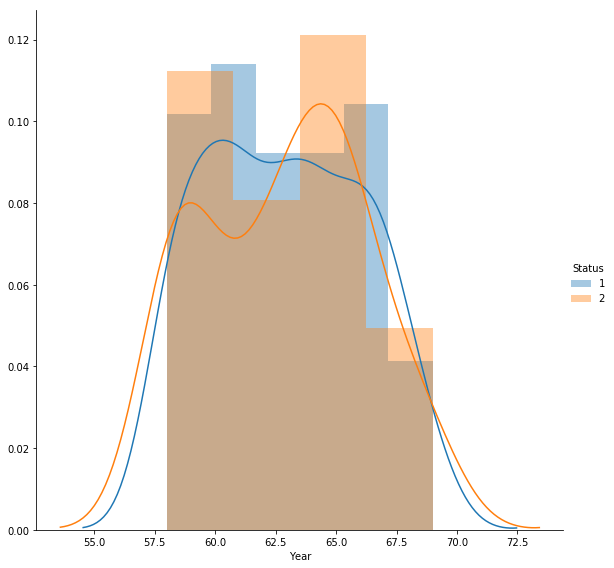

In [14]:
sns.FacetGrid(df,hue="Status",height=8)\
    .map(sns.distplot,"Year")\
    .add_legend() 
plt.show()

#distplot function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

# Observation
we cannot predict anything with these histograms as there is equal number of density in each data point.
    
Even the PDF of both classification overlap on each other.

# PDF of Age

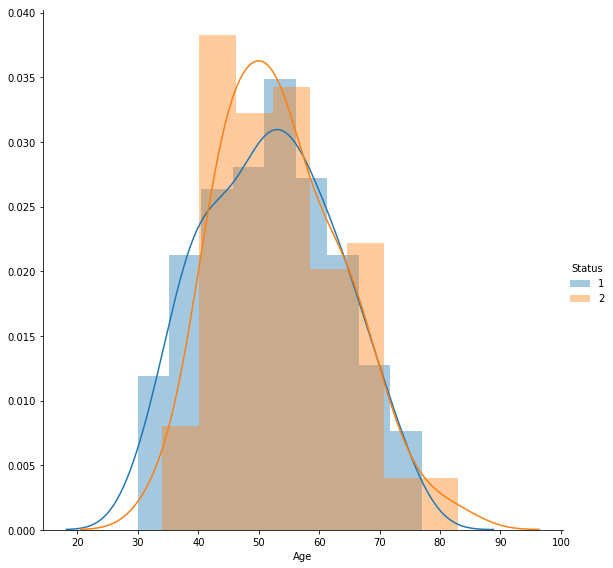

In [15]:
sns.FacetGrid(df,hue="Status",height=8)\
    .map(sns.distplot,"Age")\
    .add_legend()
plt.show()

# Observation
In above plot it is observed that at the age range from 30–75 the status of survival and death is same.
So, using this datapoint we cannot predict anything

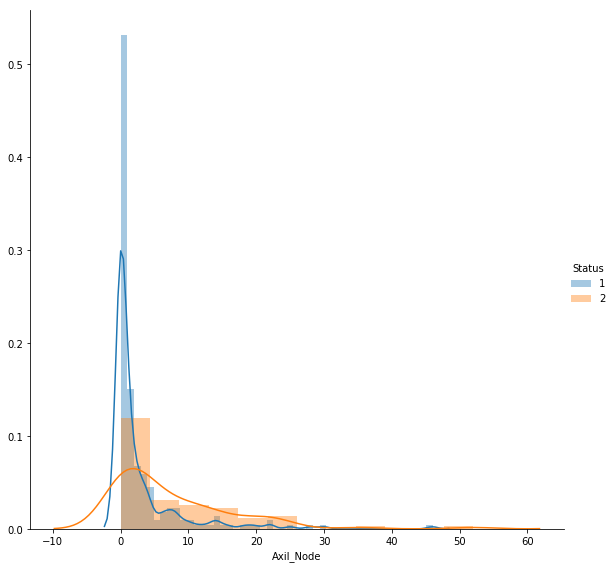

In [16]:
sns.FacetGrid(df,hue="Status",height=8)\
    .map(sns.distplot,"Axil_Node")\
    .add_legend()
plt.show()

# Observation
It has been observed that people survive long if they have less axillary nodes detected and vice versa.

In [17]:
np.mean(df['Axil_Node'])

4.026143790849673

# CDF

CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


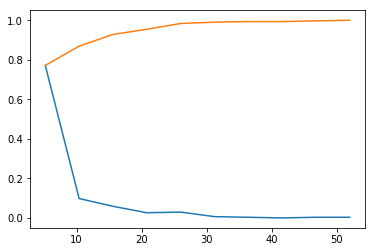

In [18]:
counts, bin_edges = np.histogram(df['Axil_Node'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

From above CDF you can observe that orange line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

# Box Plot

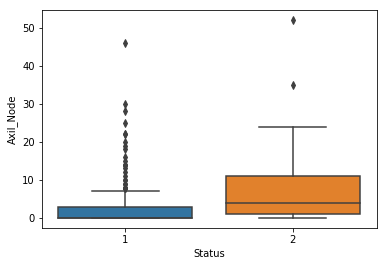

In [19]:
sns.boxplot(x='Status',y='Axil_Node',data=df)
plt.show()


# Observation:
In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2

So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status

There are most of point above 12 lies in Short survival

# Violin Plot

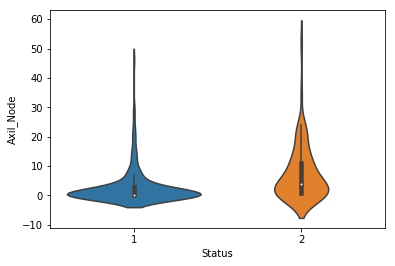

In [20]:
sns.violinplot(x='Status', y='Axil_Node',data=df)
plt.show()

# Observation:
From the violin plots we can observe that most people who survived cancer have zero positive axillary nodes

# Bivariate analysis

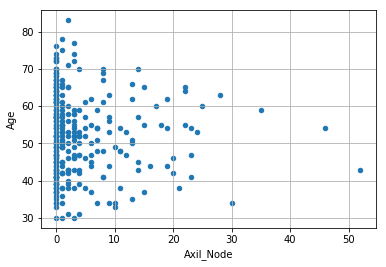

In [21]:
df.plot(kind='scatter', x='Axil_Node', y='Age') 
plt.grid()
plt.show()

Above scatter plot shows all data in overlap fashion and also in same colour due to which we are unable to distinguish between data and also there are possibilities that you may miss some of my data which may lead to wrong conclusion. So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature.

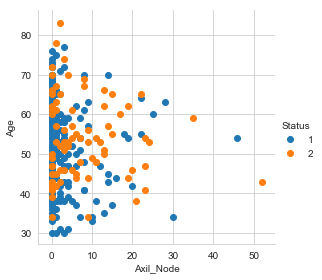

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Status', height=4) \
 .map(plt.scatter, 'Axil_Node', 'Age') \
 .add_legend();
plt.show();

# Observation
In above snippet, I import functions from seaborn library like FacetGrid due to which we are able to distinguish between the data classification.Here blue dots represent survival more than 5 years and orange dots represent survival less than 5 years.

# Pair-Plot

TypeError: 'numpy.int64' object is not iterable

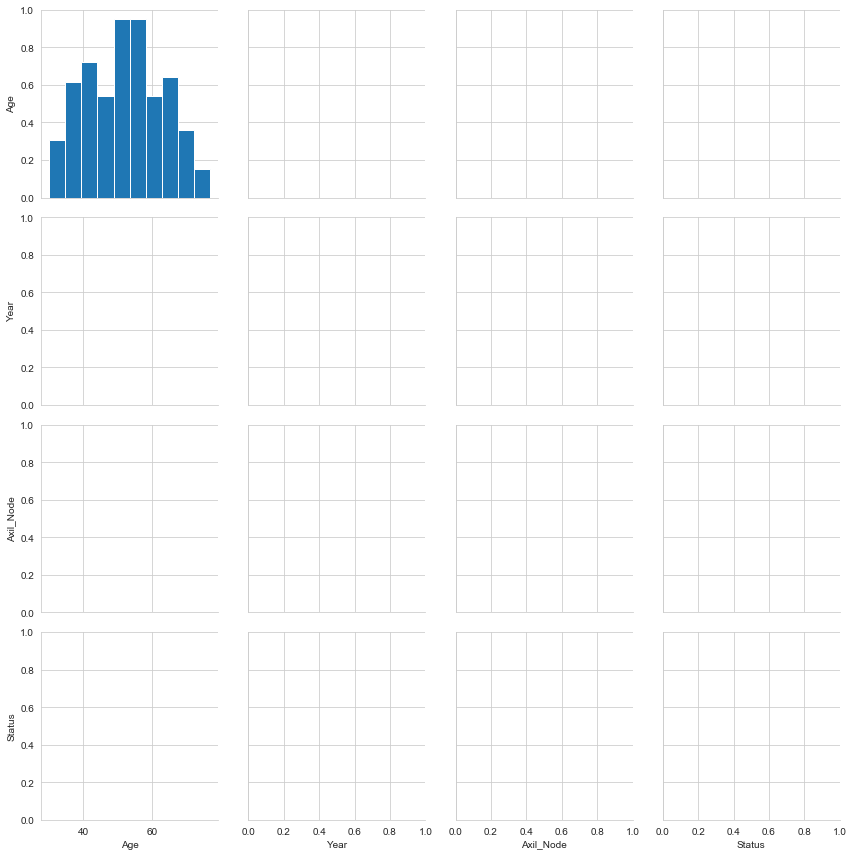

In [23]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="Status",diag_kind="hist",height=3)
plt.show()

# Observation
Now lets take plot 1 by 1 and I will explain you that which data feature I will take for my further data analysis. I will take such a data which can show me distinguishable difference than any other data feature. So,lets start analysing each plot except plot 1,5,9 as it is a histogram of features in pairplots.

Plot 2:-In this plot you can see that there is Operation Age on X-axis and Age on Y-axis and the plot of there data is mostly overlapping on each other data so we cannot distinguish if there is any orange point present below blue point or vice versa.So I am rejecting these 2 data feature combination for further analysis.

Plot 3:-In this plot there are some points which is distinguishable but still it is better from other plot as we can provide conclusion more precisely by histogram and CDF which you will learn after a while. In this plot the overlap of points are there but still it is better than all other plots comparatively. So I will select the data feature of this plot ie. Age and Axillary nodes.

Plot 4:- It is plotted using the data feature Operation Age and Age which shows similar type of plot like Plot 2 but it just rotated by 90 degree. So I also reject this feature

Plot 6:-It plot on the feature Operation Age and Axillary nodes which is somewhat similar to the Plot 2 but overlapping of points seems to be more in this plot comparative to other. So, I will also reject this combination

Plot 7:- This plot is similar as Plot 3 only feature interchange its axis so the plot will rotate by 90 degree. Also, I will accept this combination for further operations

Plot 8:- It is same as Plot 6 only feature on axis interchange.

So, I consider the feature Age and Axillary nodes plotting in the Plot 3 and 7 for my all further data operations

# Conclusion:
Yes, you can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries.